##### This script covers the main steps in the data exploration process using Python. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [15]:
data = pd.read_csv('MetroPT3.csv')

In [16]:
data.head(5)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2/1/2020 0:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1,0,1,1,0,1,1,1
1,2/1/2020 0:00,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1,0,1,1,0,1,1,1
2,2/1/2020 0:00,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1,0,1,1,0,1,1,1
3,2/1/2020 0:00,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1,0,1,1,0,1,1,1
4,2/1/2020 0:00,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1,0,1,1,0,1,1,1


In [17]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows/columns with missing values
data.dropna(inplace=True)  # Remove rows with missing values

# Remove duplicates
data.drop_duplicates(inplace=True)


timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


In [18]:
# Display basic statistics
print(data.describe())

# Display data types
print(data.dtypes)


                TP2           TP3            H1   DV_pressure    Reservoirs  \
count  1.019804e+06  1.019804e+06  1.019804e+06  1.019804e+06  1.019804e+06   
mean   1.382165e+00  8.975447e+00  7.540837e+00  8.920883e-02  8.976039e+00   
std    3.246909e+00  6.314682e-01  3.352238e+00  4.496261e-01  6.306959e-01   
min   -3.200000e-02  7.300000e-01 -3.600000e-02 -3.200000e-02  7.120000e-01   
25%   -1.400000e-02  8.480000e+00  8.250000e+00 -2.400000e-02  8.482000e+00   
50%   -1.200000e-02  8.950000e+00  8.782000e+00 -2.200000e-02  8.950000e+00   
75%   -1.000000e-02  9.478000e+00  9.364000e+00 -1.800000e-02  9.478000e+00   
max    1.067600e+01  1.030200e+01  1.028800e+01  9.844000e+00  1.030000e+01   

       Oil_temperature  Motor_current          COMP    DV_eletric  \
count     1.019804e+06   1.019804e+06  1.019804e+06  1.019804e+06   
mean      6.108735e+01   1.957011e+00  8.335925e-01  1.594591e-01   
std       6.725240e+00   2.310864e+00  3.724462e-01  3.661038e-01   
min       1.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019804 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1019804 non-null  object 
 1   TP2              1019804 non-null  float64
 2   TP3              1019804 non-null  float64
 3   H1               1019804 non-null  float64
 4   DV_pressure      1019804 non-null  float64
 5   Reservoirs       1019804 non-null  float64
 6   Oil_temperature  1019804 non-null  float64
 7   Motor_current    1019804 non-null  float64
 8   COMP             1019804 non-null  int64  
 9   DV_eletric       1019804 non-null  int64  
 10  Towers           1019804 non-null  int64  
 11  MPG              1019804 non-null  int64  
 12  LPS              1019804 non-null  int64  
 13  Pressure_switch  1019804 non-null  int64  
 14  Oil_level        1019804 non-null  int64  
 15  Caudal_impulses  1019804 non-null  int64  
dtypes: float64(7), int

In [20]:
    #convert all the values in the columns into numeric
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')

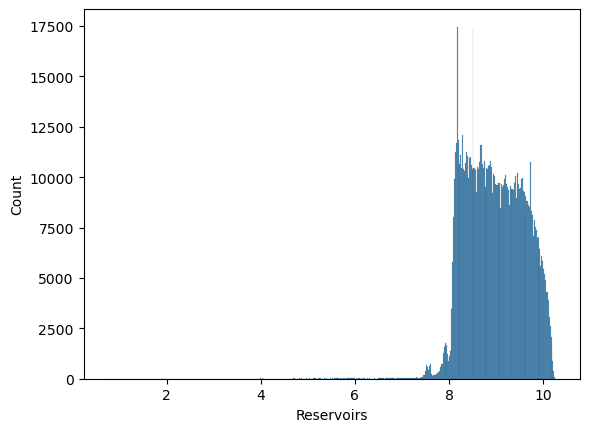

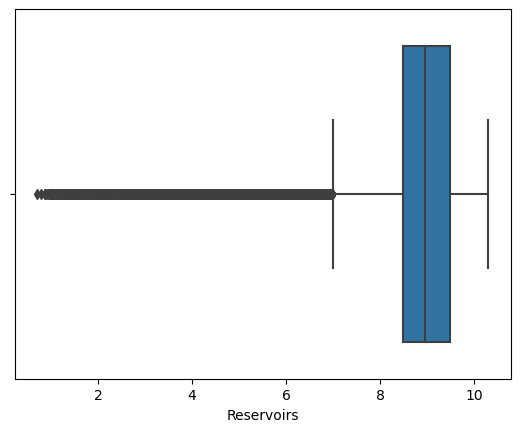

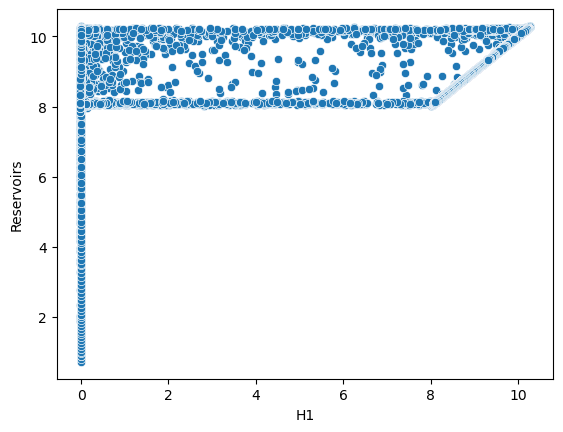

In [21]:

# Histogram of a specific column
sns.histplot(data['Reservoirs'])
plt.show()

# Box plot for another column
sns.boxplot(x=data['Reservoirs'])
plt.show()

# Scatter plot to explore relationship between two numerical variables
sns.scatterplot(x='H1', y='Reservoirs', data=data)
plt.show()


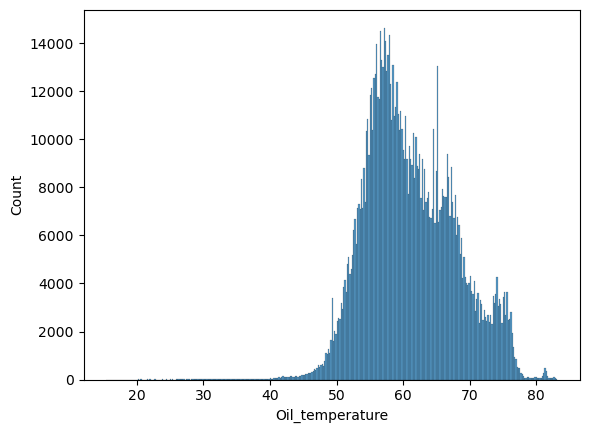

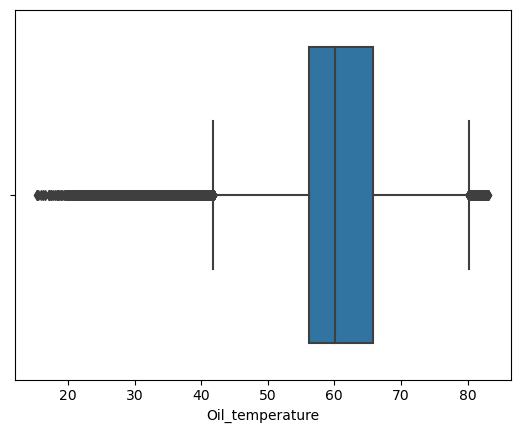

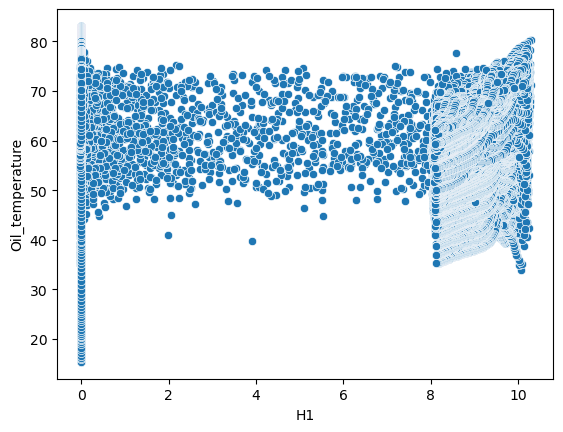

In [22]:
# Histogram of a specific column
sns.histplot(data['Oil_temperature'])
plt.show()

# Box plot for another column
sns.boxplot(x=data['Oil_temperature'])
plt.show()

# Scatter plot to explore relationship between two numerical variables
sns.scatterplot(x='H1', y='Oil_temperature', data=data)
plt.show()

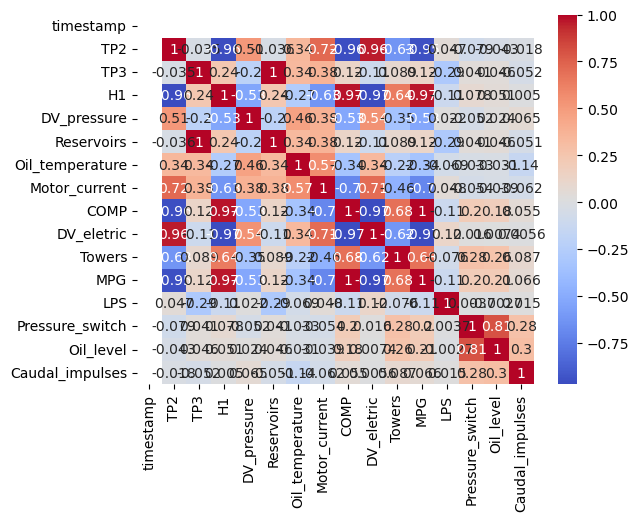

In [23]:
# Correlation matrix
correlation_matrix = data.corr()
# print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [24]:
# More detailed correlation analysis
strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.8]
print(strong_correlations)


                 timestamp       TP2       TP3        H1  DV_pressure  \
timestamp              NaN       NaN       NaN       NaN          NaN   
TP2                    NaN  1.000000       NaN -0.963978          NaN   
TP3                    NaN       NaN  1.000000       NaN          NaN   
H1                     NaN -0.963978       NaN  1.000000          NaN   
DV_pressure            NaN       NaN       NaN       NaN          1.0   
Reservoirs             NaN       NaN  0.999993       NaN          NaN   
Oil_temperature        NaN       NaN       NaN       NaN          NaN   
Motor_current          NaN       NaN       NaN       NaN          NaN   
COMP                   NaN -0.955859       NaN  0.970286          NaN   
DV_eletric             NaN  0.957982       NaN -0.969309          NaN   
Towers                 NaN       NaN       NaN       NaN          NaN   
MPG                    NaN -0.951818       NaN  0.965512          NaN   
LPS                    NaN       NaN       NaN     

In [25]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(data.select_dtypes(include=[np.number]))
print(reduced_data.shape)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

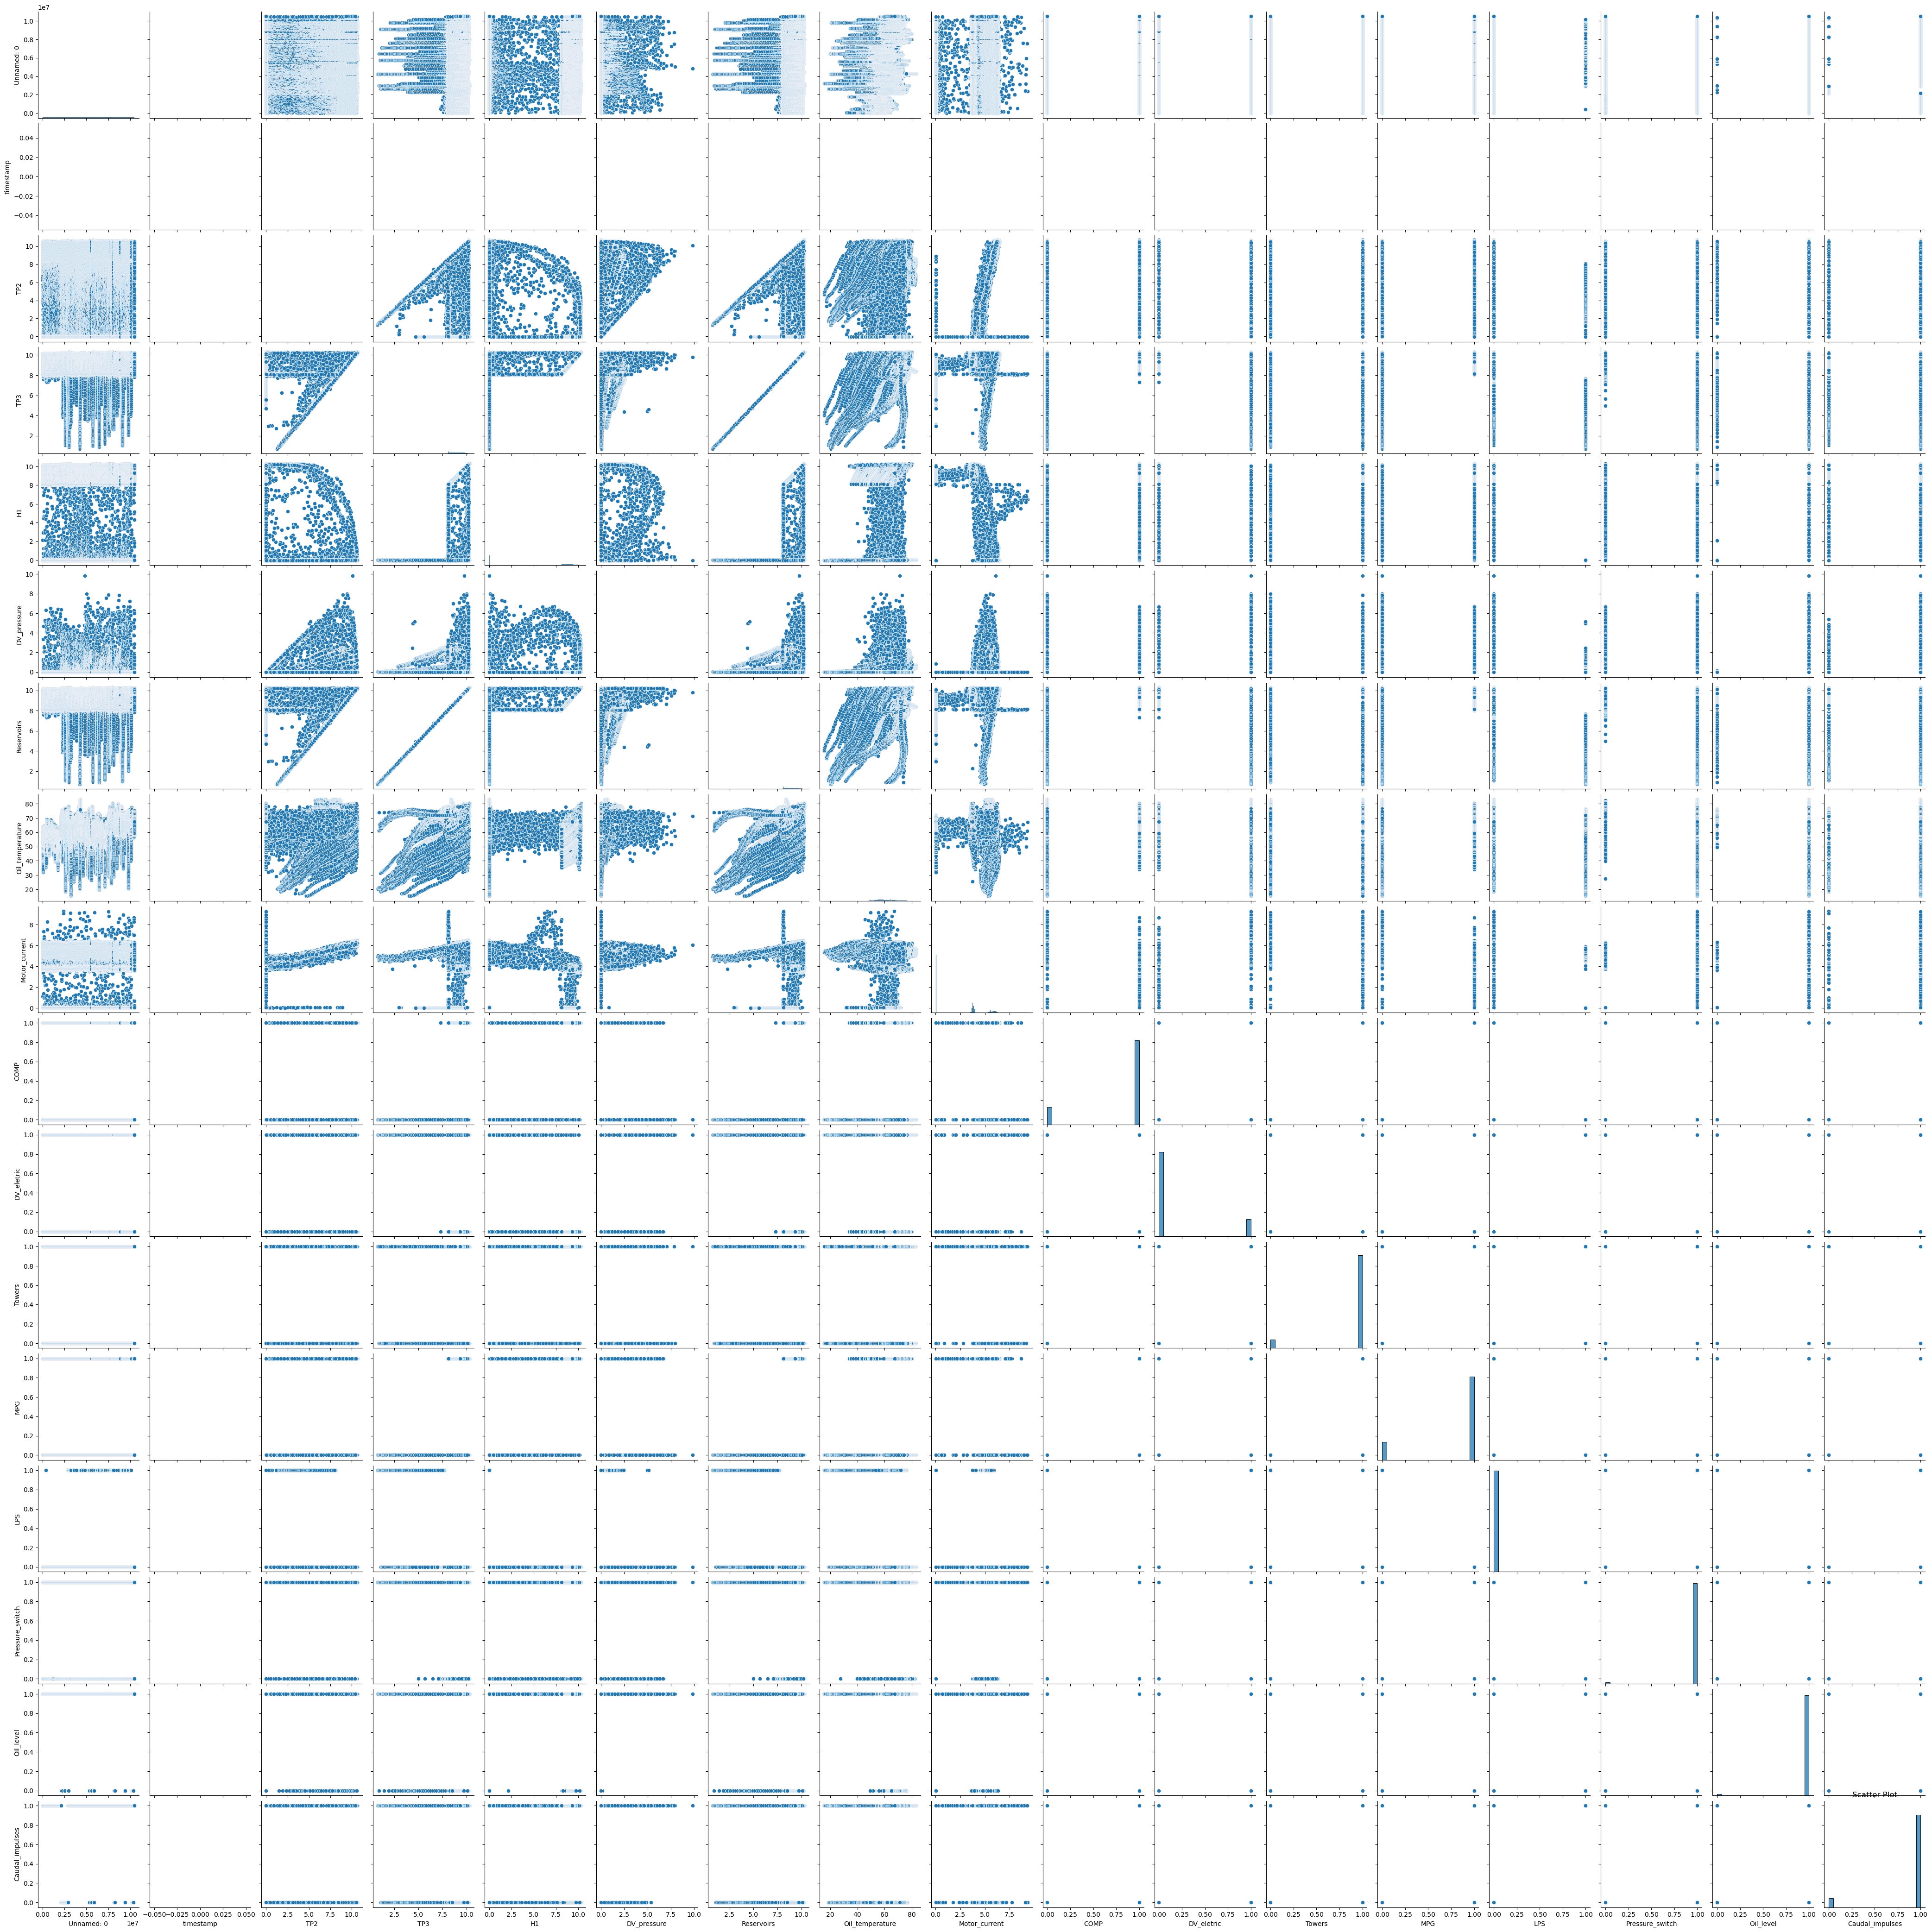

In [13]:
#Scatter plot
sns.pairplot(data, kind='scatter')
plt.title('Scatter Plot')
plt.show()